In [1]:
# Load HSAUR3 package
library(HSAUR3)

# Verify 
(.packages())

Loading required package: tools


[1] "HSAUR3"    "tools"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

In [3]:
# Visualize the dataset
data("foster", package = "HSAUR3")
foster

litgen,motgen,weight
A,A,61.5
A,A,68.2
A,A,64.0
A,A,65.0
A,A,59.7
A,B,55.0
A,B,42.0
A,B,60.2
A,I,52.5
A,I,61.8


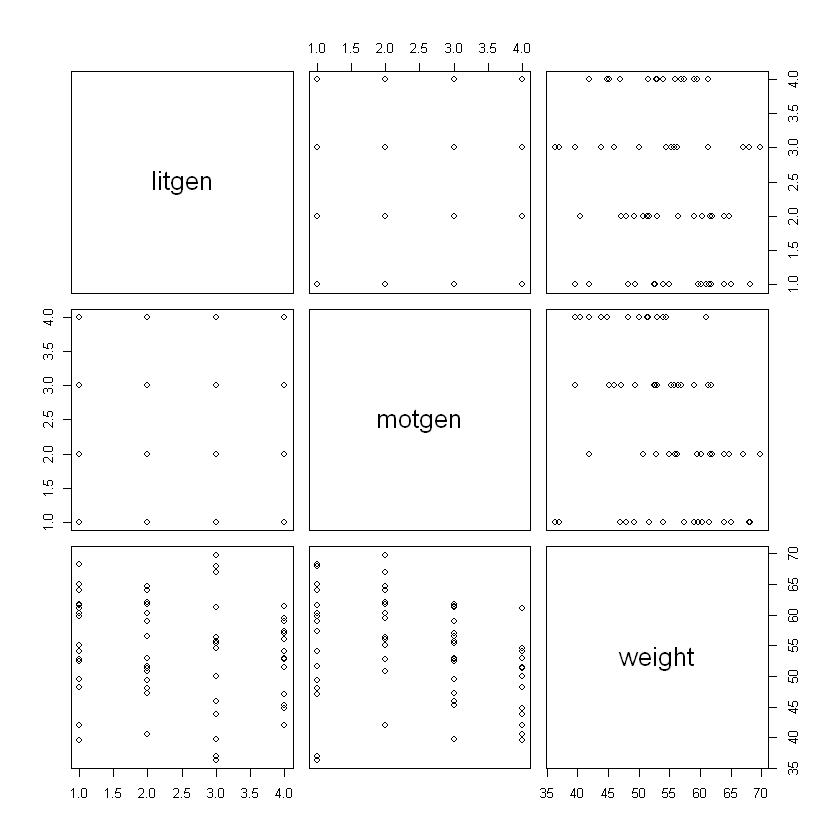

In [4]:
plot(foster)

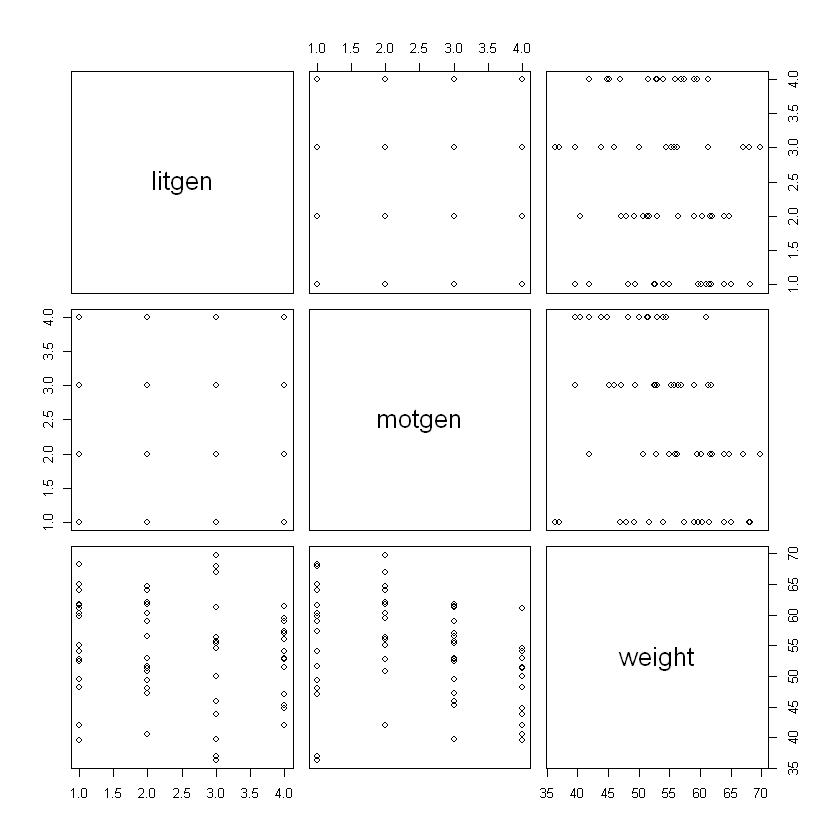

In [5]:
plot(foster)

In [7]:
# Calculate mean of each combination
tapply(foster$weight, list(foster$litgen, foster$motgen), mean)

,A,B,I,J
A,63.680,52.40000,54.12500,48.96000
B,52.325,60.64000,53.92500,45.90000
I,47.100,64.36667,51.60000,49.43333
J,54.350,56.10000,54.53333,49.06000


In [8]:
# Calculate mean of each combination
tapply(foster$weight, list(foster$litgen, foster$motgen), sd)

,A,B,I,J
A,3.273683,9.374433,5.321889,8.760594
B,5.533158,5.647389,5.114277,7.636753
I,18.103315,7.124839,8.624964,5.372461
J,5.325098,3.351119,8.376953,5.335541


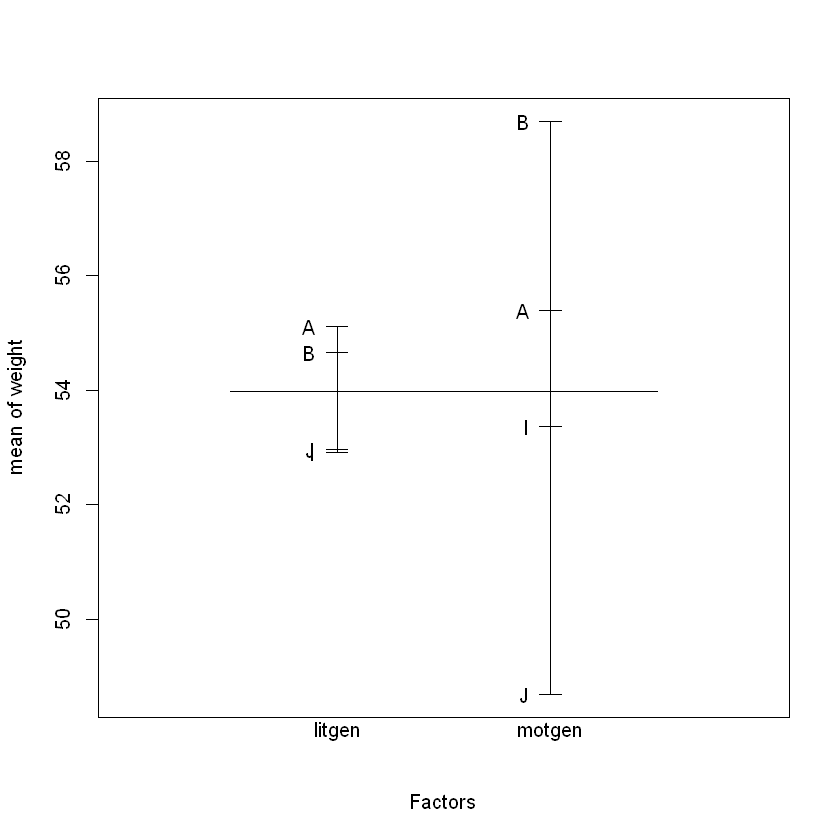

In [9]:
plot.design(foster) 

In [11]:
model.1 <- aov(weight ~ litgen * motgen, data = foster)
summary(model.1)

              Df Sum Sq Mean Sq F value  Pr(>F)   
litgen         3   60.2   20.05   0.370 0.77522   
motgen         3  775.1  258.36   4.763 0.00574 **
litgen:motgen  9  824.1   91.56   1.688 0.12005   
Residuals     45 2440.8   54.24                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [16]:
coef(model.1)

(Intercept)         litgenB         litgenI         litgenJ         motgenB 
      63.680000      -11.355000      -16.580000       -9.330000      -11.280000 
        motgenI         motgenJ litgenB:motgenB litgenI:motgenB litgenJ:motgenB 
      -9.555000      -14.720000       19.595000       28.546667       13.030000 
litgenB:motgenI litgenI:motgenI litgenJ:motgenI litgenB:motgenJ litgenI:motgenJ 
      11.155000       14.055000        9.738333        8.295000       17.053333 
litgenJ:motgenJ 
       9.430000

In [13]:
model.2 <- aov(weight ~ motgen * litgen, data = foster)
summary(model.2)

              Df Sum Sq Mean Sq F value  Pr(>F)   
motgen         3  771.6  257.20   4.742 0.00587 **
litgen         3   63.6   21.21   0.391 0.76000   
motgen:litgen  9  824.1   91.56   1.688 0.12005   
Residuals     45 2440.8   54.24                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
coef(model.2)

(Intercept)         motgenB         motgenI         motgenJ         litgenB 
      63.680000      -11.280000       -9.555000      -14.720000      -11.355000 
        litgenI         litgenJ motgenB:litgenB motgenI:litgenB motgenJ:litgenB 
     -16.580000       -9.330000       19.595000       11.155000        8.295000 
motgenB:litgenI motgenI:litgenI motgenJ:litgenI motgenB:litgenJ motgenI:litgenJ 
      28.546667       14.055000       17.053333       13.030000        9.738333 
motgenJ:litgenJ 
       9.430000

In [14]:
foster.hsd <- TukeyHSD(model.1, "motgen") 
foster.hsd

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ litgen * motgen, data = foster)

$motgen
         diff        lwr        upr     p adj
B-A  3.330369  -3.859729 10.5204672 0.6078581
I-A -1.895574  -8.841869  5.0507207 0.8853702
J-A -6.566168 -13.627285  0.4949498 0.0767540
I-B -5.225943 -12.416041  1.9641552 0.2266493
J-B -9.896537 -17.197624 -2.5954489 0.0040509
J-I -4.670593 -11.731711  2.3905240 0.3035490


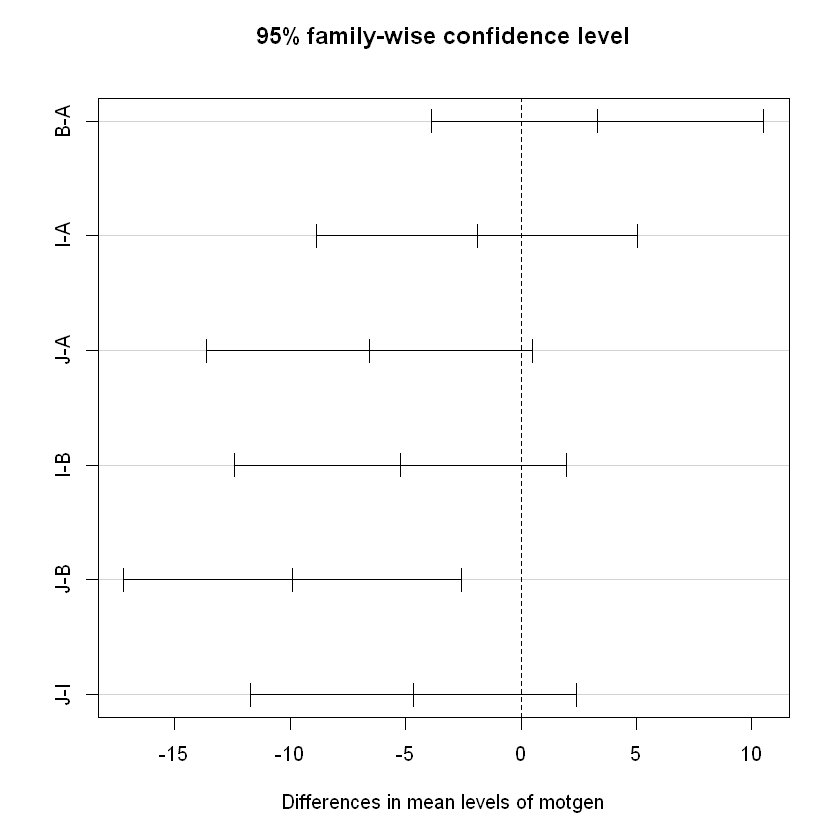

In [15]:
plot(foster.hsd)